# Fraud Detection (Using Ebay Dataset)

* [Data Understanding](#Data-Understanding)
    - Data collection/acquisition
    - Exploring Raw Data (Initial EDA)
        + Describing Data
        + Viewing Structure/Data Types
        + Verifying Data Quality
* [Data Preparation](#Data-Preparation)
    - Tidying Data (Data Wrangling)
        + Reshaping Data (melting, pivoting vs.)
        + Splitting Cells
    - Data Preprocessing (Data Wrangling?)
        + Data Cleansing
            - Missing, Outlier, Inconsistent and Noisy Data Analysis
            - Converting Data Types
        + Data Transformation (Manipulation)
            - Feature Engineering
            - Feature Scaling (Standardization, Normalization)
            - Feature Selection (Data Reduction)
    - Data Exploration (EDA)
        + Summary
        + Visual
    - Sampling (Data cok buyukse)?
    - Data Splitting
    - Setting up a Pipeline (Asagidaki asamada olabilir)?
* [Modelling](#Modelling)
    - Selecting Modeling Techniques
    - Building Model
    - Assessing Model
* [Evaluation](#Evaluation)
    - Evaluating Results
    - Reviewing Process

---

## Data Understanding

In [2]:
# Import necessary modules

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data collection/acquisition

In [3]:
df = pd.read_csv("data/autos.csv", encoding='cp1252')

### Exploring Raw Data (Initial EDA)

In [4]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [6]:
df.describe(include='object')

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
count,371528,371528,371528,371528,371528,333659,351319,351044,338142,371528,299468,371528,371528
unique,280500,233531,2,2,2,8,2,251,7,40,2,114,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,test,limousine,manuell,golf,benzin,volkswagen,nein,2016-04-03 00:00:00,2016-04-07 06:45:59
freq,7,657,371525,371516,192585,95894,274214,30070,223857,79640,263182,14450,17


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

In [8]:
# Check the levels of potentially unnecessary columns
inspect_cols = ['seller', 'offerType', 'nrOfPictures', 'abtest', 'notRepairedDamage', 'fuelType']
for col in inspect_cols:
    print(df[col].value_counts(), '\n')

privat        371525
gewerblich         3
Name: seller, dtype: int64 

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64 

0    371528
Name: nrOfPictures, dtype: int64 

test       192585
control    178943
Name: abtest, dtype: int64 

nein    263182
ja       36286
Name: notRepairedDamage, dtype: int64 



In [17]:
# Check the Postal Code column for wrong entries
sum(df.postalCode < 10000), sum(df.postalCode > 99999)

(18650, 0)

There are wrong entries in the column. For the regression problem, we'll drop this column. Thus, I'll not do anything about the noisy values.

- _Incomplete_: Missing/Not Recorded
- _Noisy_: Containing errors or outliers that deviate from the expected. > Having incorrect attribute values
- _Inconsistent_: Containing discrepancies in the department codes or names. > Inconsistent with other recorded data

## Data Preparation

### Tidying Data

The columns `lastSeen` and `dateCreated` can be used to estimate how long a car will be at least online before it is sold.

In [18]:
# Create a new column about how long a car will is online
df['duration'] = pd.to_datetime(df['lastSeen']) - pd.to_datetime(df['dateCreated'])
df['duration'].head()

0   14 days 03:16:57
1   14 days 01:46:50
2   22 days 12:47:46
3    0 days 17:40:17
4    6 days 10:17:21
Name: duration, dtype: timedelta64[ns]

### Data Preprocessing 

### Data Cleansing

In [19]:
# Drop unnecessary columns
df.drop(['seller', 'offerType', 'dateCrawled', 'nrOfPictures', 'lastSeen', 'postalCode', 'dateCreated', 'monthOfRegistration'], axis='columns', inplace=True)

# Drop 'name' column for initial analysis (This column includes plain text user entries of car descriptions)
df.drop(['name'], axis='columns', inplace=True) # Requires further feature engineering

#### Missing Data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 12 columns):
price                 371528 non-null int64
abtest                371528 non-null object
vehicleType           333659 non-null object
yearOfRegistration    371528 non-null int64
gearbox               351319 non-null object
powerPS               371528 non-null int64
model                 351044 non-null object
kilometer             371528 non-null int64
fuelType              338142 non-null object
brand                 371528 non-null object
notRepairedDamage     299468 non-null object
duration              371528 non-null timedelta64[ns]
dtypes: int64(4), object(7), timedelta64[ns](1)
memory usage: 34.0+ MB


In [24]:
df.describe(include = "all")

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,duration
count,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,338142,371528,299468,371528
unique,NaN,2,8,NaN,2,NaN,251,NaN,7,40,2,NaN
top,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,benzin,volkswagen,nein,NaN
freq,NaN,192585,95894,NaN,274214,NaN,30070,NaN,223857,79640,263182,NaN
mean,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,NaN,NaN,NaN,9 days 07:54:59.053137
std,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,NaN,NaN,NaN,8 days 15:56:06.301870
min,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,NaN,NaN,NaN,0 days 00:25:36
25%,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,NaN,NaN,NaN,2 days 13:31:44
50%,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,NaN,NaN,NaN,6 days 12:44:38
75%,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,NaN,NaN,NaN,14 days 02:15:24.250000


In [26]:
# Count the NaNs
df.isnull().sum()

price                     0
abtest                    0
vehicleType           37869
yearOfRegistration        0
gearbox               20209
powerPS                   0
model                 20484
kilometer                 0
fuelType              33386
brand                     0
notRepairedDamage     72060
duration                  0
dtype: int64

For initial regression analysis, I'll drop all the NaNs. However, 

**!!!** I think it is highly possible that **fraudulent** ads have less information on specific columns. Such a pattern may indicate an anomaly. Therefore, instead of removing the null values, we may want to keep them and impute NaNs with a specific string value such as "not available".
**!** Another possibility is that missing values are explicitly written in the user entry (description) section of the ad. We may need to extract these values and fill the NaNs with those information if available.

In [27]:
# Drop all the rows with missing data
df.dropna(inplace = True)

# Fill NaNs with "not available"
# df[['vehicleType', 'gearbox', 'model', 'fuelType', 'notRepairedDamage']].fillna(value='not available', inplace=True)

In [28]:
# Count the NaNs
df.isnull().sum()

price                 0
abtest                0
vehicleType           0
yearOfRegistration    0
gearbox               0
powerPS               0
model                 0
kilometer             0
fuelType              0
brand                 0
notRepairedDamage     0
duration              0
dtype: int64

In [ ]:
df.shape

#### Noisy and Inconsistent Data

In [30]:
# Check for duplicate rows
df.duplicated().sum()

99

In [31]:
# Delete duplicates
df.drop_duplicates(inplace=True)

In [33]:
df.price.describe()

count    2.608570e+05
mean     8.208850e+03
std      3.433742e+05
min      0.000000e+00
25%      1.500000e+03
50%      3.850000e+03
75%      8.600000e+03
max      1.000000e+08
Name: price, dtype: float64

In [35]:
df[df.price > 1000000].head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,duration
20143,1250000,test,coupe,2016,manuell,500,911,5000,benzin,porsche,nein,3 days 04:48:27
21467,9999999,control,coupe,1967,manuell,215,911,50000,benzin,porsche,nein,13 days 10:45:30
54295,10000000,control,bus,2007,manuell,143,5_reihe,150000,diesel,mazda,nein,2 days 14:17:16
78480,1250000,test,coupe,2016,manuell,500,911,5000,benzin,porsche,nein,5 days 15:19:48
91106,9999999,test,limousine,1996,manuell,380,a4,60000,benzin,audi,nein,0 days 19:46:05


In [36]:
df[df.price == 0].head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,duration
7,0,test,limousine,1980,manuell,50,andere,40000,benzin,volkswagen,nein,4 days 16:47:58
157,0,test,bus,2004,manuell,101,meriva,150000,lpg,opel,ja,1 days 23:47:10
604,0,test,limousine,1996,manuell,170,5er,150000,benzin,bmw,nein,0 days 11:37:43
642,0,test,limousine,1998,manuell,75,polo,150000,benzin,volkswagen,ja,2 days 10:44:39
897,0,test,kombi,2009,manuell,170,a6,150000,diesel,audi,ja,0 days 10:40:29


In [40]:
print(sum(df.price < 100))
print(sum(df.price == 0))
print(sum(df.price > 150000))

4022
3389
111


There are so many 0s in the price column. We'd assume these values are missing and drop the rows with wrong values.

!!Note that these may indicade anomaly.

In [41]:
df = df[(df.price < 150000) & (df.price > 100)]

In [42]:
df.shape

(256395, 12)

In [53]:
df.powerPS.describe()

count    256395.000000
mean        126.606751
std         143.073626
min           0.000000
25%          80.000000
50%         116.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64

PowerPS (Horsepower) should be not less than 50 and not higher than 1000. Therefore, there is some noisy data here as well. https://auto.howstuffworks.com/one-horse-engine.htm

In [63]:
sum((df.powerPS < 50) | (df.powerPS > 1000))

12397

In [64]:
df = df[(df.powerPS < 1000) & (df.powerPS > 50)]

In [65]:
df.shape

(241116, 13)

### Data Exploration (EDA)

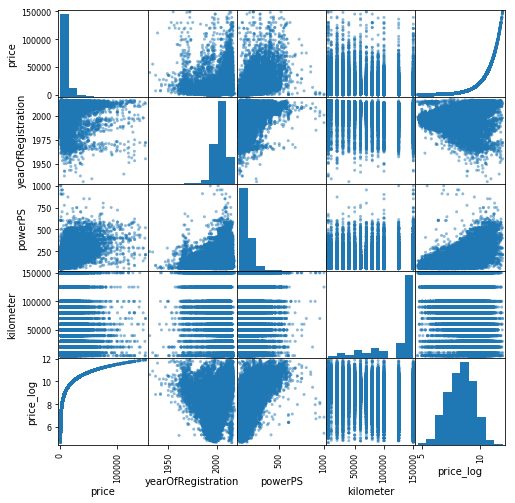

In [66]:
pd.plotting.scatter_matrix(df, figsize = [8, 8])
plt.show()

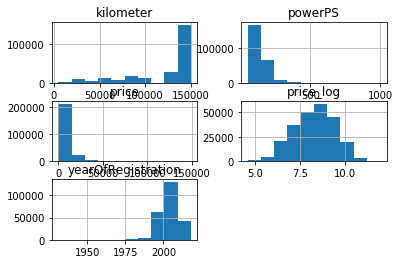

In [67]:
df.hist()
plt.show()

In [80]:
df_df.columns[df.dtypes == "object"]

Index(['abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand',
       'notRepairedDamage'],
      dtype='object')

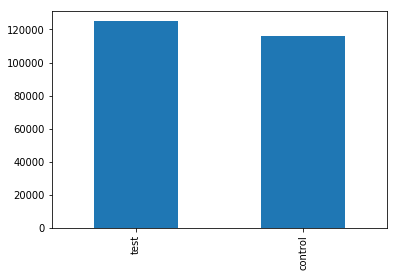

In [93]:
df.abtest.value_counts().plot.bar()

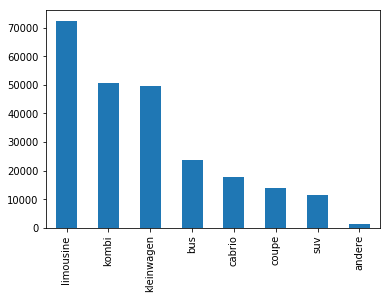

In [94]:
df.vehicleType.value_counts().plot.bar()

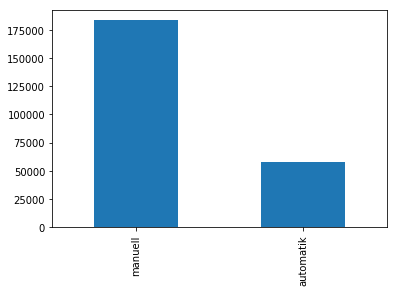

In [95]:
df.gearbox.value_counts().plot.bar()

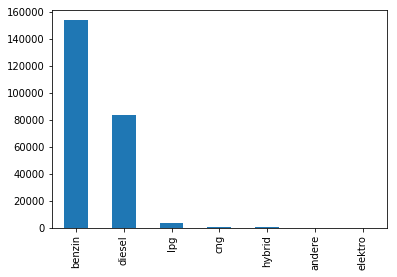

In [97]:
df.fuelType.value_counts().plot.bar()

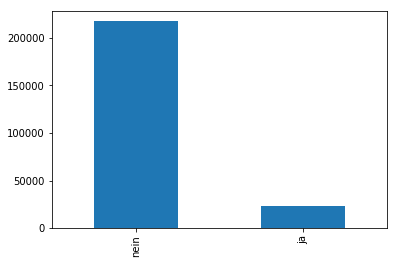

In [98]:
df.notRepairedDamage.value_counts().plot.bar()

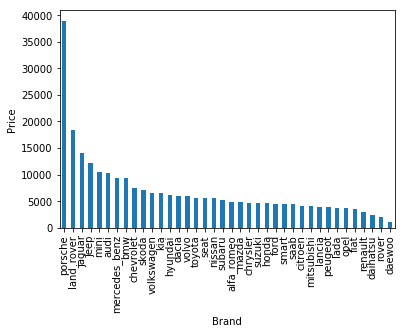

In [156]:
df.groupby("brand").price.mean().sort_values(ascending=False).plot.bar()
plt.xlabel("Brand")
plt.ylabel("Price")
plt.show()

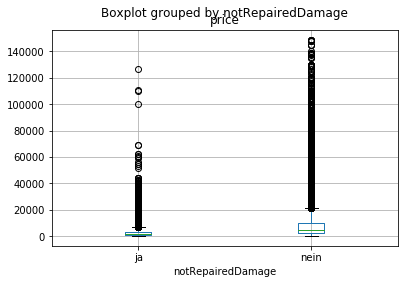

In [161]:
df.boxplot("price", by="notRepairedDamage")

### Data Transformation (Manipulation)

### Feature Scaling

#### Normalization

In [99]:
df.price.describe()

count    241116.000000
mean       6977.447710
std        8428.489091
min         101.000000
25%        1799.000000
50%        4199.000000
75%        8999.000000
max      149000.000000
Name: price, dtype: float64

It is better to perform a **_log transformation_** on the target variable since it is strongly right skewed.

Some values in the `price` column were initially `0`. Thus, we would normally use `numpy.log1p` instead of `numpy.log`. `numpy.log1p` calculates `log(1 + x)`. However, since we have dealt with wrong values, we can use `numpy.log`.

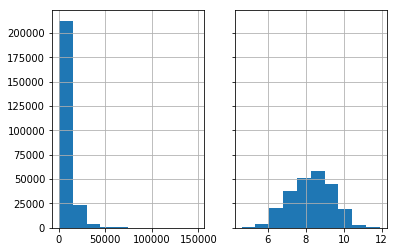

In [115]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True)
df.price.hist(ax=ax)
np.log(df.price).hist(ax=ax2)
plt.show()

In [116]:
df['price_log'] = np.log(df.price)

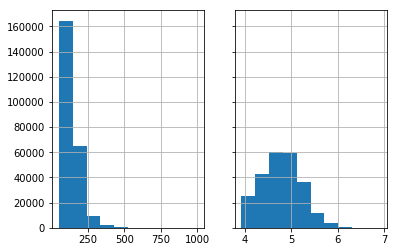

In [117]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True)
df.powerPS.hist(ax=ax)
np.log(df.powerPS).hist(ax=ax2)
plt.show()

In [118]:
df['powerPS_log'] = np.log(df.powerPS)

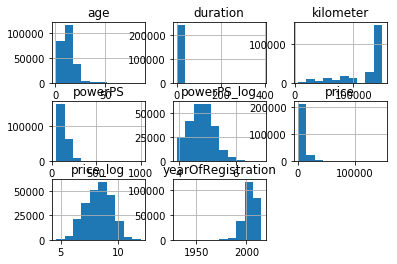

In [134]:
df.hist()
plt.show()

#### Scaling/Standardizing Columns

In [119]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,duration,price_log,powerPS_log
count,241116.000000,241116.000000,241116.000000,241116.000000,241116,241116.000000,241116.000000
mean,6977.447710,2003.699987,131.599533,123644.656514,9 days 18:54:34.312969,8.283799,4.786473
std,8428.489091,6.209874,61.576605,39910.037956,8 days 16:31:02.654056,1.117580,0.425427
min,101.000000,1931.000000,51.000000,5000.000000,0 days 00:36:14,4.615121,3.931826
25%,1799.000000,2000.000000,90.000000,100000.000000,2 days 17:31:37.500000,7.494986,4.499810
50%,4199.000000,2004.000000,120.000000,150000.000000,7 days 02:47:03.500000,8.342602,4.787492
75%,8999.000000,2008.000000,160.000000,150000.000000,14 days 19:15:58.500000,9.104869,5.075174
max,149000.000000,2018.000000,999.000000,150000.000000,384 days 03:45:01,11.911702,6.906755


In [135]:
df.var()

price                 6.970700e+07
yearOfRegistration    3.842079e+01
powerPS               3.785109e+03
kilometer             1.578683e+09
duration              7.608483e+01
price_log             1.245868e+00
powerPS_log           1.808810e-01
age                   3.842079e+01
dtype: float64

In [26]:

# X_train_std = sc.fit_transform(X_train)
# X_test_std = sc.transform(X_test)

# # Import StandardScaler from scikit-learn
# from sklearn.preprocessing import StandardScaler

# # Create the scaler
# ss = StandardScaler()

# # Take a subset of the DataFrame you want to scale 
# df_subset = df[['Ash', 'Alcalinity of ash', 'Magnesium']]

# # Apply the scaler to the DataFrame subset
# df_subset_scaled = ss.fit_transform(df_subset)

### Feature Engineering

#### Numeric

In [121]:
# Extract the day from the 'duration' column
df["duration"] = df["duration"].apply(lambda d: d.days)
df.duration.head()

3      0
4      6
5      2
6      4
10    11
Name: duration, dtype: int64

count    241116.000000
mean         12.300013
std           6.209874
min          -2.000000
25%           8.000000
50%          12.000000
75%          16.000000
max          85.000000
Name: age, dtype: float64


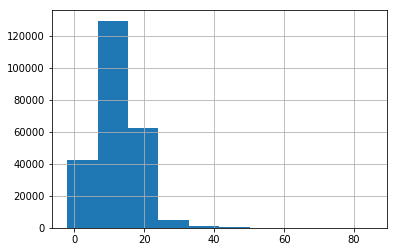

In [122]:
df["age"] = 2016 - df["yearOfRegistration"]
print(df.age.describe())
df["age"].hist()

In [123]:
# Print the wrong entries of yearOfRegistration
df[df.age < 0]

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,duration,price_log,powerPS_log,age
45578,9999,test,kombi,2017,manuell,102,a3,90000,benzin,audi,nein,10,9.210240,4.624973,-1
56888,2350,control,limousine,2017,automatik,170,5er,150000,benzin,bmw,nein,23,7.762171,5.135798,-1
102481,2350,control,limousine,2017,automatik,170,5er,150000,benzin,bmw,nein,16,7.762171,5.135798,-1
137101,11950,control,bus,2017,manuell,130,transporter,150000,diesel,volkswagen,nein,2,9.388487,4.867534,-1
167126,1900,control,kleinwagen,2018,manuell,75,polo,150000,benzin,volkswagen,nein,7,7.549609,4.317488,-2
248702,1650,control,coupe,2018,manuell,140,3er,150000,benzin,bmw,nein,17,7.408531,4.941642,-2
258859,6000,control,kleinwagen,2017,manuell,155,punto,150000,benzin,fiat,nein,12,8.699515,5.043425,-1
350979,3150,test,kombi,2017,manuell,135,golf,20000,benzin,volkswagen,nein,14,8.055158,4.905275,-1


In [128]:
df = df[df.age > 0]

!!! These negative values might indicate anomaly.

### Categorical Features

In [139]:
df.dtypes

price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
fuelType               object
brand                  object
notRepairedDamage      object
duration                int64
price_log             float64
powerPS_log           float64
age                     int64
dtype: object

In [174]:
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)
df.shape

(240816, 306)

In [32]:
# labels = ['name', 'gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']
# les = {}

# for l in labels:
#     les[l] = preprocessing.LabelEncoder()
#     les[l].fit(dedups[l])
#     tr = les[l].transform(dedups[l]) 
#     dedups.loc[:, l + '_feat'] = pd.Series(tr, index=dedups.index)

# labeled = dedups[ ['price'
#                         ,'yearOfRegistration'
#                         ,'powerPS'
#                         ,'kilometer'
#                         ,'monthOfRegistration'
#                         , 'namelen'] 
#                     + [x+"_feat" for x in labels]]

## Feature Selection

In [ ]:
# Drop unnecessary columns
df.drop(['yearOfRegistration', 'price', 'powerPS'], axis='columns', inplace=True)

In [163]:
corr = df[df.columns[(df.dtypes == "int64") | (df.dtypes == "float64")]].corr()

Text(0.5, 1.0, 'Pairwise Correlation Between (numeric) Variables')

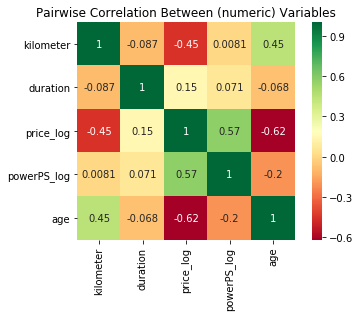

In [164]:
sns.heatmap(corr, square=True, cmap='RdYlGn', annot = True).set_title('Pairwise Correlation Between (numeric) Variables')

In [165]:
# List the correlation coefficients in ascending order
corr.loc[:,'price_log'].abs().sort_values(ascending=False)[1:]

age            0.616955
powerPS_log    0.571263
kilometer      0.450776
duration       0.153471
Name: price_log, dtype: float64

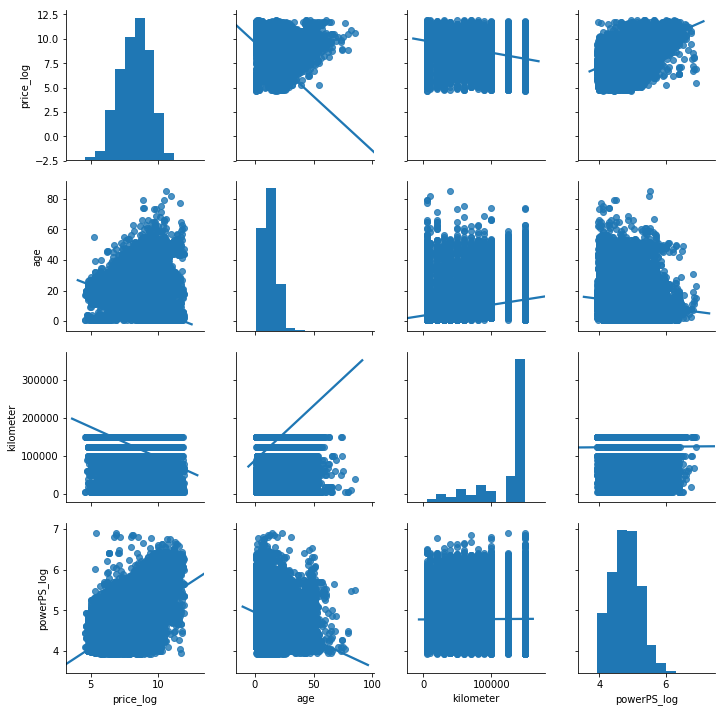

In [168]:
sns.pairplot(df[['price_log', 'age', 'kilometer', 'powerPS_log']], kind="reg")

### Dimensionality Reduction

In [176]:
# features
X = df.drop('price_log', axis = 1)

# Target
y = df['price_log']

In [177]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=84)

#### PCA

In [178]:
from sklearn.decomposition import PCA

# Set up PCA for diminsionality reduction
pca = PCA(10)

# Apply PCA to the dataset X vector
X_train = pca.fit_transform(X_train)  

X_test = pca.transform(X_test)

The PCA class has an attribute `explained_variance_ratio_` which returns the *variance* caused by each of the principal components.

In [179]:
# Look at the percentage of variance explained by the different components
pca.explained_variance_ratio_

array([9.99999931e-01, 4.71021195e-08, 1.93752227e-08, 2.97520252e-10,
       2.07669286e-10, 1.64915602e-10, 1.57674760e-10, 1.21046034e-10,
       1.10162497e-10, 9.36641126e-11])

#### Lasso

In [ ]:
# from sklearn.linear_model import Lasso

# # Instantiate Lasso regressor
# lasso = Lasso(alpha = 0.0001, normalize = True)

# # Fit the regressor
# lasso.fit(X, y)

# # Compute the coefficients
# lasso_coef = lasso.coef_

# # Compute the number of features with non-zero coefficients
# print(sum(lasso_coef != 0))

# # Lasso score
# print(lasso.score(X, y))
# # print(lasso_coef)

In [ ]:
# df_features = df.drop('price_log', axis = 1)

# plt.plot(range(len(df_features.columns)), lasso_coef)
# plt.xticks(range(len(df_features.columns)), df_features.columns.values, rotation=60)
# plt.title('Coefficients')
# plt.margins(0.02)
# plt.show()

In [42]:
# df.to_csv('data/autos_clean.csv', index=False)

---

## Modelling

In [43]:
# # features
# X = df.drop('price', axis = 1).values

# # Target
# y = df['price'].values

In [44]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=84)

Linear Regression using the Principal Components.

In [184]:
from sklearn.linear_model import LinearRegression

# Create the regressor
reg = LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train, y_train)

# Print the R-squared
print("R^2: {0:.2f}".format(reg.score(X_test, y_test)))

R^2: 0.66


In [186]:
from sklearn.model_selection import cross_val_score

# Create the regressor
reg_cv = LinearRegression()

# 5-fold cross-validation score
cv_scores = cross_val_score(reg_cv, X, y, cv=5)

# Mean score
np.mean(cv_scores)

0.7844461225746829

In [199]:
from sklearn.ensemble import RandomForestRegressor

# Create the regressor
reg_rf = RandomForestRegressor(n_estimators = 100)

# Fit to the training data (Principal Components)
reg_rf.fit(X_train, y_train)

reg_rf.score(X_test, y_test)

0.861590051666261

In [200]:
reg_rf.feature_importances_

array([0.1524133 , 0.02655574, 0.44440463, 0.12132243, 0.05864433,
       0.02472503, 0.01432603, 0.06752227, 0.03181095, 0.0582753 ])

n_jobs : int or None, optional (default=None)
Number of jobs to run in parallel. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.

In [197]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# rf = RandomForestRegressor()

# param_grid = { "criterion" : ["mse"] # default
#               , "min_samples_leaf" : [2, 3]
#               , "min_samples_split" : [2, 3]
#               , "max_depth": [10, 20]
#               , "n_estimators": [10, 20]}

# gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
# gs = gs.fit(X_train, y_train)

# print(gs.best_score_)
# print(gs.best_params_)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:  2.2min finished


0.8498624164903995
{'criterion': 'mse', 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 20}


---

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# from sklearn.decomposition import PCA

# # Setup the pipeline
# steps = [('pca', PCA(10)),
#          ('randomforest', RandomForestRegressor())]

# pipeline = Pipeline(steps)

# # Create train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# param_grid = { "criterion" : ["mse"] # default
#                , "min_samples_leaf" : [2, 3]
#                , "min_samples_split" : [2, 3]
#                , "max_depth": [10]
#                , "n_estimators": [10, 20]}

# # Create the GridSearchCV object: gm_cv
# estimator = GridSearchCV(pipeline, parameters, cv=2)

# # Fit to the training set
# estimator.fit(X_train, y_train)

# # Compute and print the metrics
# r2 = estimator.score(X_test, y_test)
# print("Tuned RandomForest Params: {}".format(estimator.best_params_))
# print("Tuned RandomForest R squared: {}".format(r2))


## Evaluation

---